In [2]:
from micromind import Metric
from micromind.utils.parse import parse_arguments

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import os
import random
import importlib
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
import pickle

batch_size = 64

In [3]:
with open('embeddings_all.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"]
y = data["labels"]

In [4]:
print(x.shape)
print(y.shape)

torch.Size([49984, 344])
torch.Size([49984])


In [5]:
embeddings = np.array(x)

/Users/sebastiancavada/anaconda3/envs/ai701/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[0 1 1 ... 1 0 0]


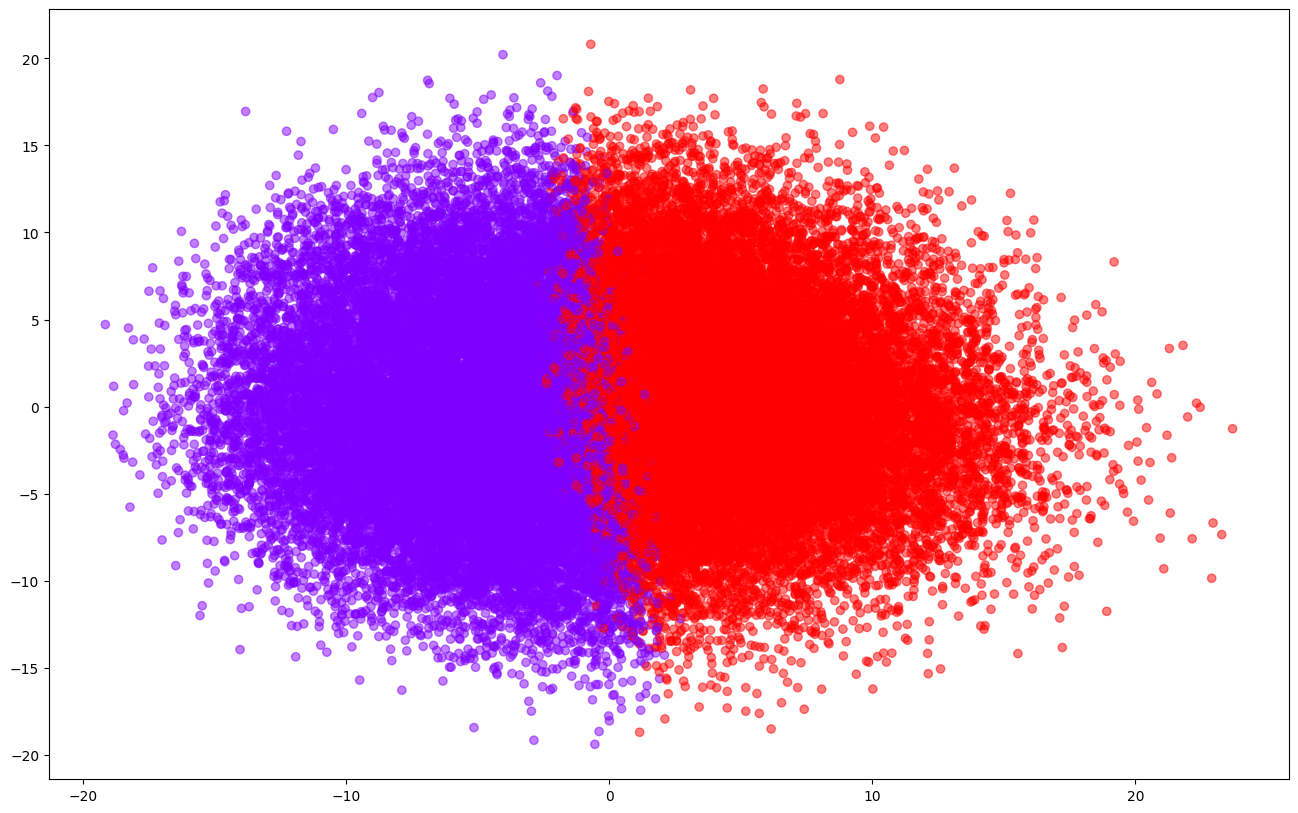

In [39]:
## L2 distancem clustering

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters=2, random_state=0).fit(embeddings)
print(kmeans.labels_)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

plt.figure(figsize=(16,10))
plt.scatter(pca_result[:,0], pca_result[:,1], c=kmeans.labels_, cmap='rainbow', alpha=0.5)
plt.show()



In [35]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 49984 samples in 0.005s...
[t-SNE] Computed neighbors for 49984 samples in 8.561s...
[t-SNE] Computed conditional probabilities for sample 1000 / 49984
[t-SNE] Computed conditional probabilities for sample 2000 / 49984
[t-SNE] Computed conditional probabilities for sample 3000 / 49984
[t-SNE] Computed conditional probabilities for sample 4000 / 49984
[t-SNE] Computed conditional probabilities for sample 5000 / 49984
[t-SNE] Computed conditional probabilities for sample 6000 / 49984
[t-SNE] Computed conditional probabilities for sample 7000 / 49984
[t-SNE] Computed conditional probabilities for sample 8000 / 49984
[t-SNE] Computed conditional probabilities for sample 9000 / 49984
[t-SNE] Computed conditional probabilities for sample 10000 / 49984
[t-SNE] Computed conditional probabilities for sample 11000 / 49984
[t-SNE] Computed conditional probabilities for sample 12000 / 49984
[t-SNE] Computed conditional probabilities for sa

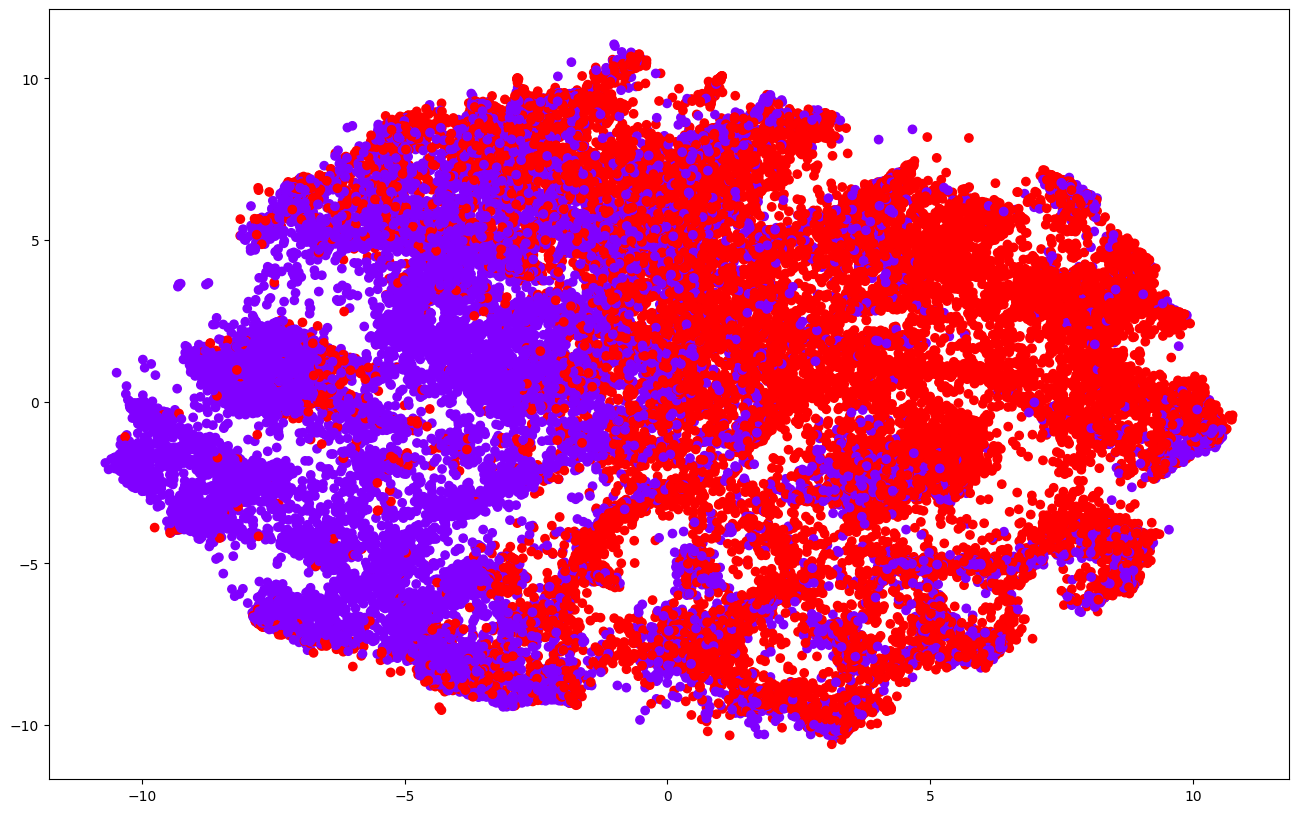

In [38]:
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [20]:
tsne_3 = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results_3 = tsne.fit_transform(embeddings)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 49984 samples in 0.004s...
[t-SNE] Computed neighbors for 49984 samples in 9.181s...
[t-SNE] Computed conditional probabilities for sample 1000 / 49984
[t-SNE] Computed conditional probabilities for sample 2000 / 49984
[t-SNE] Computed conditional probabilities for sample 3000 / 49984
[t-SNE] Computed conditional probabilities for sample 4000 / 49984
[t-SNE] Computed conditional probabilities for sample 5000 / 49984
[t-SNE] Computed conditional probabilities for sample 6000 / 49984
[t-SNE] Computed conditional probabilities for sample 7000 / 49984
[t-SNE] Computed conditional probabilities for sample 8000 / 49984
[t-SNE] Computed conditional probabilities for sample 9000 / 49984
[t-SNE] Computed conditional probabilities for sample 10000 / 49984
[t-SNE] Computed conditional probabilities for sample 11000 / 49984
[t-SNE] Computed conditional probabilities for sample 12000 / 49984
[t-SNE] Computed conditional probabilities for sa

/Users/sebastiancavada/anaconda3/envs/ai701/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[6 7 4 ... 8 2 7]


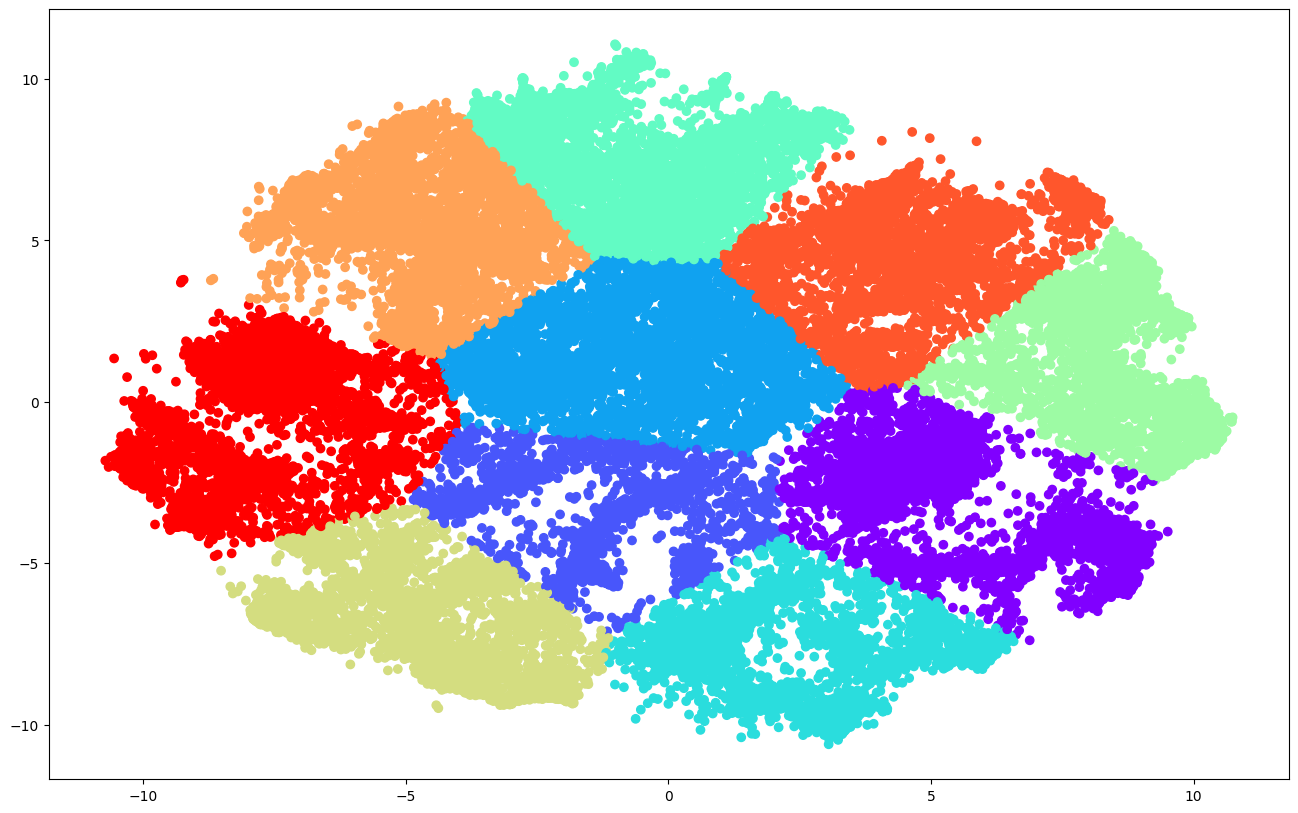

In [15]:
# do clustering on the projection
kmeans = KMeans(n_clusters=10, random_state=0).fit(tsne_results)
print(kmeans.labels_)

plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [19]:
! pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 458.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for numba>=0.51.2 from https://files.pythonhosted.org/packages/39/44/e5540c376f6b99d906f46bdf98ce4d91511a0ee89ce60a62e2498dacd6fe/numba-0.58.1-cp310-cp310-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/47/d5/2d6261a47dd6b1005d60a6e37a3de007ddc15a297f146ee905605e3cbc3e/llvmlite-0.41.1-cp310-cp310-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 6.5 MB/s eta 0:00:0000:0100:01m
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86758 sha256=0807a9527b504

In [24]:
import umap
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(embeddings)

/Users/sebastiancavada/anaconda3/envs/ai701/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



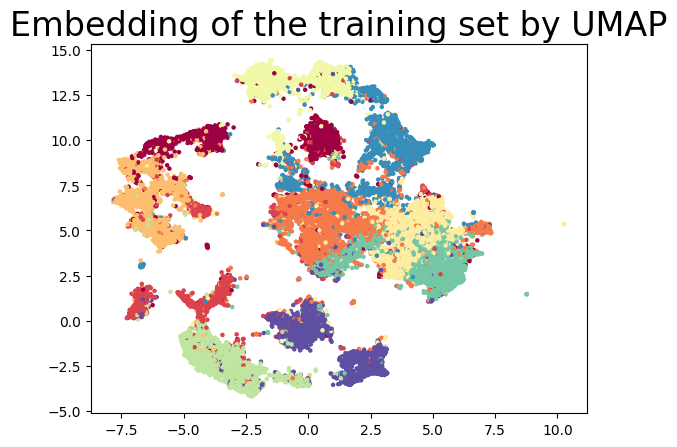

In [25]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=kmeans.labels_, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [32]:
#fit a decision tree classifier to the data

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0, max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.247074122236671


In [33]:
#fit a decision tree classifier to the data

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0, max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.20666199859957987
